In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Mnist 데이터 불러오기

(x_train,_),(x_test,_)= mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32') / 255

In [3]:
# 생성자 모델 만들기

autoencoder = Sequential()

# 인코딩 부분(차원을 축소하는 부분)
autoencoder.add(Conv2D(16,kernel_size=3,padding='same',input_shape=(28,28,1),activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
# 입력을 줄이기 위한 방법 : maxpooling 사용 
autoencoder.add(Conv2D(8,kernel_size=3, padding='same', activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3, strides = 2,padding='same', activation='relu'))

In [4]:
# 디코딩 부분(차원을 늘리는 부분)
autoencoder.add(Conv2D(8,kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8,kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16,kernel_size=3, activation='relu'))
# padding 과정이 없다. >> 크기 축소, kernel_size 3*3 >> 차원 축소 
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1,kernel_size=3,padding='same', activation='sigmoid'))

# 전체 구조 확인
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

In [5]:
# 컴파일 및 학습 

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test,x_test))

#  학습된 결과 출력
random_test = np.random.randint(x_test.shape[0], size=5)
# 테스트 할 이미지 랜덤하게 불러오기
ae_imgs = autoencoder.predict(x_test)
# 오토 인코더 모델에 넣어 예측하기 

Epoch 1/50
469/469 [==============================] - 18s 37ms/step - loss: 0.2070 - val_loss: 0.1401
Epoch 2/50
469/469 [==============================] - 19s 40ms/step - loss: 0.1285 - val_loss: 0.1187
Epoch 3/50
469/469 [==============================] - 19s 41ms/step - loss: 0.1155 - val_loss: 0.1106
Epoch 4/50
469/469 [==============================] - 19s 41ms/step - loss: 0.1092 - val_loss: 0.1057
Epoch 5/50
469/469 [==============================] - 19s 41ms/step - loss: 0.1051 - val_loss: 0.1021
Epoch 6/50
469/469 [==============================] - 19s 41ms/step - loss: 0.1020 - val_loss: 0.0995
Epoch 7/50
469/469 [==============================] - 19s 41ms/step - loss: 0.0996 - val_loss: 0.0973
Epoch 8/50
469/469 [==============================] - 19s 41ms/step - loss: 0.0976 - val_loss: 0.0954
Epoch 9/50
469/469 [==============================] - 19s 41ms/step - loss: 0.0959 - val_loss: 0.0939
Epoch 10/50
469/469 [==============================] - 19s 41ms/step - loss: 0.094

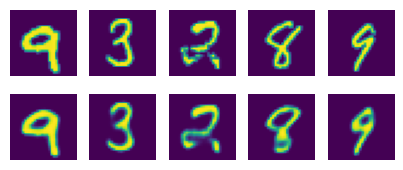

In [6]:
# 데이터 시각화

plt.figure(figsize=(7,2))

for i, image_idx in enumerate(random_test):
    # 랜덤하게 추출한 이미지를 차례로 나열
    ax = plt.subplot(2,7,i+1) 
    plt.imshow(x_test[image_idx].reshape(28,28))
    # 테스트할 이미지를 먼저 그대로 보여준다. 
    ax.axis('off')
    ax = plt.subplot(2,7,7+i+1)
    plt.imshow(ae_imgs[image_idx].reshape(28,28))
    #  오토 인코딩 결과를 다음 열에 출력한다.
    ax.axis('off')
    
plt.show()